In [73]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [74]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [75]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [76]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [77]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
features = df_market_data

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [78]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Copy the crypto names from the original data
coin_ids = df_market_data.index

# Set the coinid column as index
scaled_df.index = coin_ids

# Display sample data
scaled_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [79]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [80]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(scaled_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [81]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

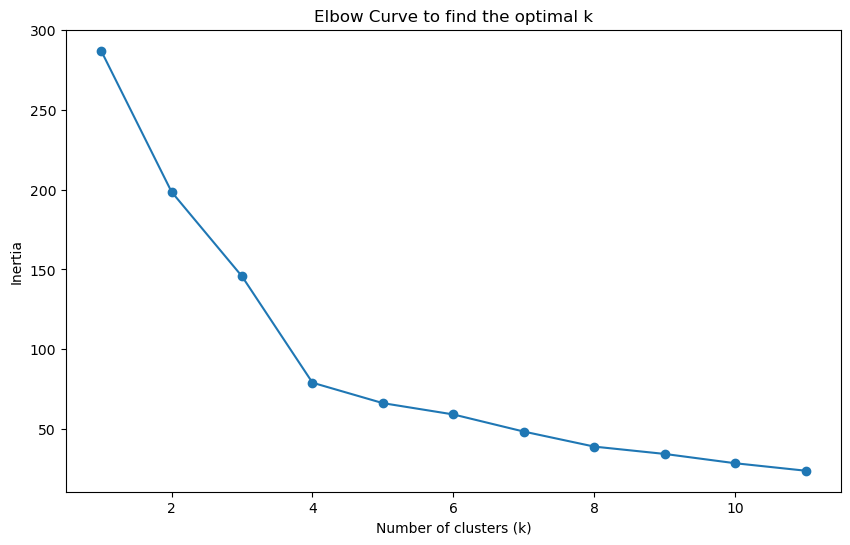

In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to find the optimal k')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k appears to be 4. This is the point where the slope of the curve smooths out and further improvements in inertia become less significant with additional values of k.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [83]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_original = KMeans(n_clusters=best_k, random_state=0)

In [84]:
# Fit the K-Means model using the scaled data
kmeans_original.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [85]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters_original = kmeans_original.predict(scaled_df)

# Print the resulting array of cluster values
print(clusters_original)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [86]:
# Create a copy of the DataFrame
scaled_df_clusters = scaled_df.copy()


In [87]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_clusters['cluster'] = clusters_original

# Display sample data
print(scaled_df_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [88]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_original = scaled_df_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters using Original Data',
    width=600,
    height=400
)

scatter_plot_original

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [89]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [90]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_features = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame.
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [91]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

Explained variance ratio: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950316570309842.

In [92]:
# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3'])
# Copy the crypto names from the original data
coin_ids = df_market_data.index

# Set the coinid column as index
pca_df.index = coin_ids

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [93]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [94]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using `pca_df`
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans.inertia_)


In [95]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values_pca}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

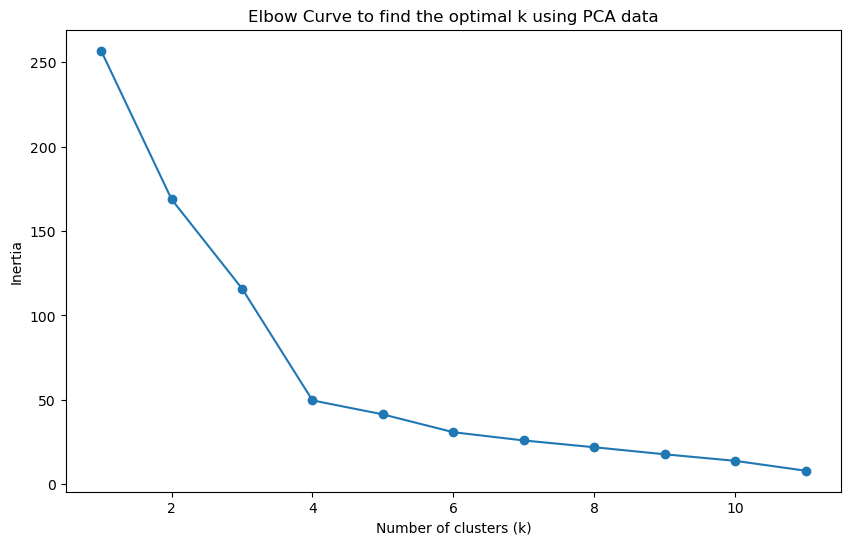

In [96]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve to find the optimal k using PCA data')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data appears to be 4. This is where the slope of the curve begins to smooth out, indicating the optimal number of clusters.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. The best value for k using both the original data and the PCA data is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [97]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4 
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [98]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [99]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [100]:
# Create a copy of the DataFrame with the PCA data
pca_df_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_clusters['cluster'] = clusters_pca

# Display sample data
print(pca_df_clusters.head())

                   PC1       PC2       PC3  cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


In [101]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = pca_df_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters using PCA Data'
)

scatter_plot_pca

:Scatter   [PC1]   (PC2,cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

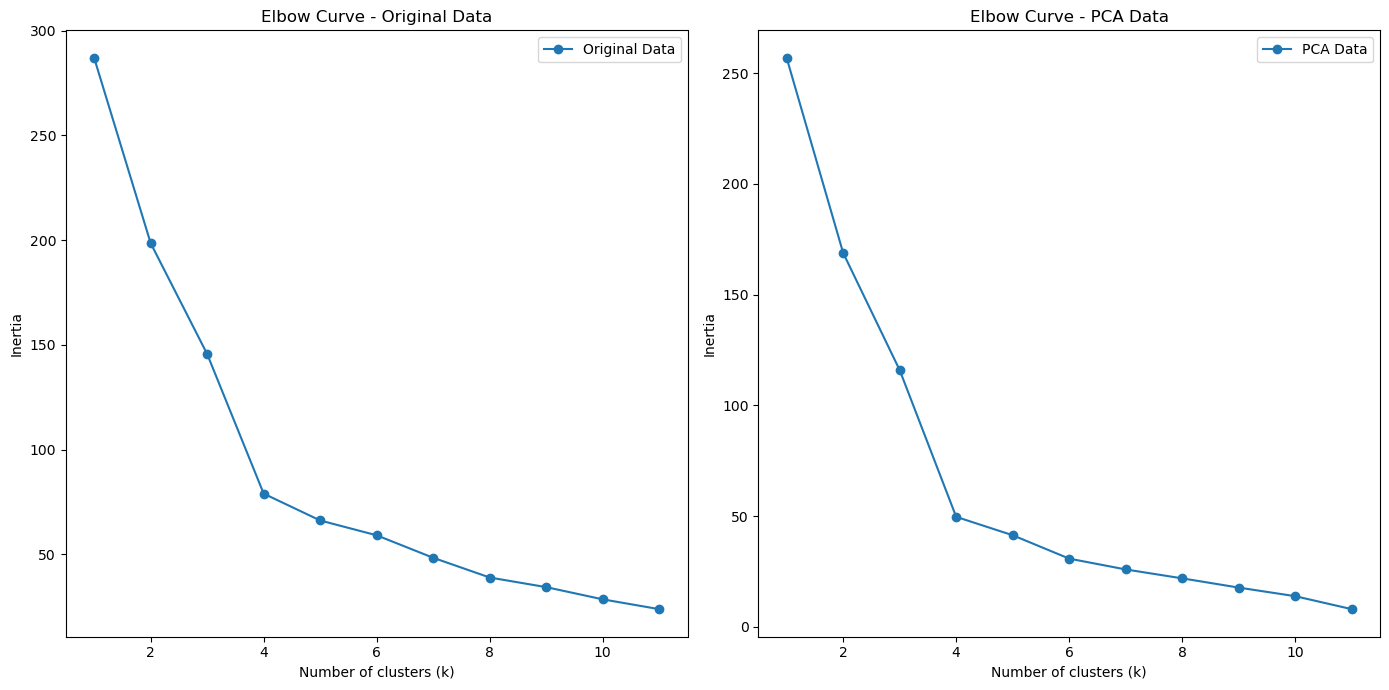

In [102]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(14, 7))

# Plot the Elbow Curve using the original data
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', label='Original Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve - Original Data')
plt.legend()

# Plot the Elbow Curve using the PCA data
plt.subplot(1, 2, 2)
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o', label='PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve - PCA Data')
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
# Composite plot to contrast the clusters
import hvplot.pandas

# Create a scatter plot for the original data
scatter_plot_original = scaled_df.assign(cluster=kmeans_original.labels_).hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters using Original Data',
    width=600,
    height=400
)

# Create a scatter plot for the PCA data
scatter_plot_pca = pca_df_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters using PCA Data',
    width=600,
    height=400
)

# Display the plots side by side
scatter_plot_original + scatter_plot_pca


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster the data, as done with PCA, often simplifies the clustering process and can lead to more distinct and interpretable clusters. In the provided results, clustering with PCA data results in tighter, more compact clusters compared to the original data. This indicates that the PCA process effectively captured the most significant variance in the data, thereby enhancing the clustering performance. Additionally, it reduced noise and redundant features, making the clusters more defined and easier to analyze.